# Probability of having $ab = 0$ for $(a, b) \in (Z/nZ)^2$

## Import necessary libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

## Function to calculate directly the probability of having $ab = 0$ for $(a, b) \in (Z/nZ)^2$


In [34]:
from eval import pro_null_pairs

## Function to calculate that probability using the sum formula : $\frac{1}{n}\sum_{d|n} \frac{\phi(d)}{d}$


In [35]:
from eval import sum_formula

## Function to calculate that probability using the product formula : $\prod_{k=1}^{m} \frac{p_k \cdot (\alpha_k + 1) - \alpha_k}{p_k^{\alpha_k + 1}}$ where $n = \prod_{k=1}^{m} p_k^{\alpha_k}$

In [36]:
from eval import prod_formula

## Main calculations and comparisons

In [37]:
n_values = np.arange(2, 100)  # Example values for n
results = np.zeros((len(n_values) + 1, 4), dtype=object)

total_direct_time = 0
total_formula1_time = 0
total_formula2_time = 0

for i, n in enumerate(n_values):
    start_time = time.time()
    direct_count = pro_null_pairs(n)
    direct_time = time.time() - start_time
    total_direct_time += direct_time

    start_time = time.time()
    formula1_result = sum_formula(n)
    formula1_time = time.time() - start_time
    total_formula1_time += formula1_time

    start_time = time.time()
    formula2_result = prod_formula(n)
    formula2_time = time.time() - start_time
    total_formula2_time += formula2_time

    results[i] = [n, direct_count, formula1_result, formula2_result]

# Add the total times to the results array
results[-1] = ['Total Time', total_direct_time, total_formula1_time, total_formula2_time]

# Convert results to a pandas DataFrame for better display
columns = ['n', 'Direct Evaluation', 'Sum Formula', 'Product Formula']
results_df = pd.DataFrame(results, columns=columns)

# Display results in a table
pd.set_option('display.max_rows', None)
pd.set_option('display.show_dimensions', False)
print(results_df.to_string(index=False))


         n Direct Evaluation Sum Formula Product Formula
         2              0.75        0.75            0.75
         3          0.555556    0.555556        0.555556
         4               0.5         0.5             0.5
         5              0.36        0.36            0.36
         6          0.416667    0.416667        0.416667
         7          0.265306    0.265306        0.265306
         8            0.3125      0.3125          0.3125
         9          0.259259    0.259259        0.259259
        10              0.27        0.27            0.27
        11          0.173554    0.173554        0.173554
        12          0.277778    0.277778        0.277778
        13          0.147929    0.147929        0.147929
        14           0.19898     0.19898         0.19898
        15               0.2         0.2             0.2
        16            0.1875      0.1875          0.1875
        17          0.114187    0.114187        0.114187
        18          0.194444   

## Plotting of the results

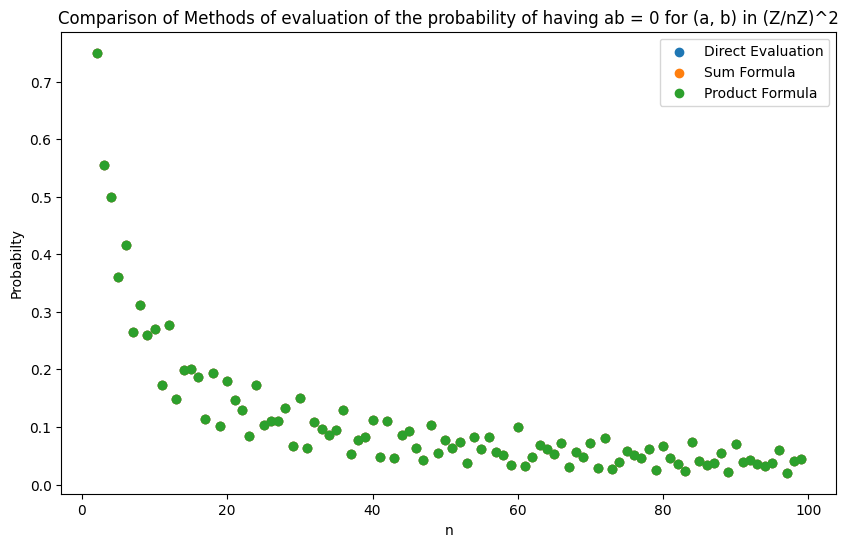

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(n_values, results[:-1, 1].astype(float), label='Direct Evaluation')
plt.scatter(n_values, results[:-1, 2].astype(float), label='Sum Formula')
plt.scatter(n_values, results[:-1, 3].astype(float), label='Product Formula')
plt.xlabel('n')
plt.ylabel('Probabilty')
plt.legend()
plt.title('Comparison of Methods of evaluation of the probability of having ab = 0 for (a, b) in (Z/nZ)^2')
plt.show()